In [19]:
#Logistic Regressssion

problem statement 
we have dataset of loan aprroval
>automate loan eligibility process
>identify customer whose loan will be approved

solution:
import libraries and read data
identify and deal with missing values
create dummy variable
normalise the data
select relevent columns
split the dataset in training and test datasets
train and evalute the model


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
LoanData= pd.read_csv("C:\\Users\\2004674\\Downloads\\01Exercise1.csv")
# LoanData.head()
display(LoanData)


,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [21]:
LoanPrep = LoanData.copy()

# indentifying the misisng value
LoanPrep.isnull().sum(axis=0) #axis 0 for rows

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [22]:
#drop the rows with missing values
LoanPrep=LoanData.dropna()

LoanPrep.isnull().sum(axis=0) 

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [23]:
#creae dummy variable
# on the basis of gender we can not decide we should give loan or not 
#so wi will drop the column

In [24]:
LoanPrep = LoanPrep.drop(['gender'],axis = 1)


In [25]:
#checking the data types 
LoanPrep.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [26]:
# ch is data type of flaot but we should have type as categrocal
#but ch contains only 0 and 1 values so making it categorical does makes sense

In [27]:
LoanPrep = pd.get_dummies(LoanPrep,drop_first=True)


Data normalization is a vital pre-processing, mapping, and scaling method that helps forecasting and prediction models become more accurate. The current data range is transformed into a new, standardized range using this method. Normalization is extremely important when it comes to bringing disparate prediction and forecasting techniques into harmony. Data normalization improves the consistency and comparability of different predictive models by standardizing the range of independent variables or features within a dataset, leading to more steady and dependable results

In [28]:
#NOrmalize the data for Loanamt and income using standardScaler

from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()

LoanPrep['income'] =scaler_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt'] =scaler_.fit_transform(LoanPrep[['loanamt']])

In [29]:
#Create the X (independent) and Y (Dependent) Dataframe

y = LoanPrep[['status_Y']]
x = LoanPrep.drop(['status_Y'],axis=1)

#split the x and y dataset into Training and testing set
#starify 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = \
train_test_split(x,y,test_size=0.3,random_state=1234,stratify=y)

In [30]:
#Build the logistic Regression Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)

c:\Python\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
y_predict = lr.predict(x_test)

In [32]:
# confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(y_test,y_predict)
lr.score(x_test,y_test)

cr = classification_report(y_test,y_predict)
# print(cr)

score2 =accuracy_score(y_test,y_predict) 
print(score2)

0.8616352201257862


In [34]:
# get the probabilities of the preiction

y_prob = lr.predict_proba(x_test)[:,1]

In [36]:
# create predictions based on probalility thereshold

y_new_pred =[]
threshold = 0.8

for i in range(0, len(y_prob)):
    if y_prob [i] > threshold:
        y_new_pred.append(1)
    else:
        y_new_pred.append(0)

In [39]:
cm2 = confusion_matrix(y_test,y_new_pred)

score2 =accuracy_score(y_test,y_new_pred) 
cr2 = classification_report(y_test,y_new_pred)

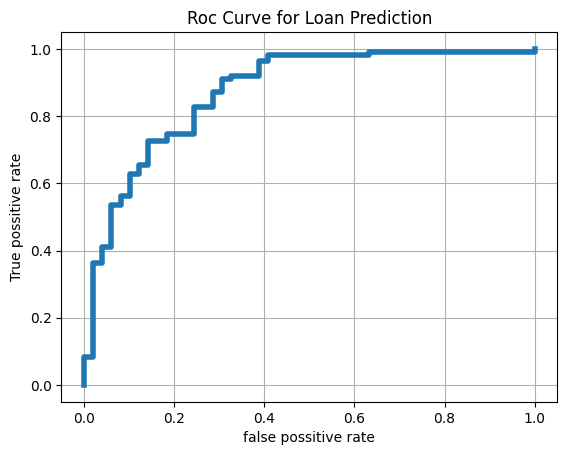

In [41]:
# get theb  AUC and Plot the curve
from sklearn.metrics import roc_auc_score,roc_curve

fpr, tpr, threshold = roc_curve(y_test,y_prob)

AUC = roc_auc_score(y_test,y_prob)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel("false possitive rate")
plt.ylabel("True possitive rate")
plt.title("Roc Curve for Loan Prediction")
plt.grid()